In [32]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [2]:
arr = []
with open("data.csv", newline='' ) as csvfile:
    for row in csvfile.readlines()[1:]:
        row = row.rstrip()
        arr.append(row.split(','))
       #print(row)

iui = []
for ar in arr:
    iui.append(ar[0] + " " +  ar[1])
#print(iui)
print(len(set(iui)))


300


In [3]:
dataFrame = pd.DataFrame(arr, columns = ["gene_id","spot_id","time","spot_fluorescence"])
dataFrame.set_index(['gene_id', 'spot_id'], inplace = True)
dataFrame.sort_index(inplace=True)
dataFrame

time spot_fluorescence
gene_id spot_id                        
1       1           0                 0
        1          20                 0
        1          40                 0
        1          60                 0
        1          80                 0
...               ...               ...
2       99       2920                 0
        99       2940                 0
        99       2960                 0
        99       2980                 0
        99       3000                 0

[45300 rows x 2 columns]

In [4]:
def fall_check(arr):
    total = 0
    index = arr[0]
    for i in arr[1:]:
        if(i < index):
            total += (index - i)
        index = i
    return total

In [5]:
features = []
curr_geneid = 1
curr_spotid = 1
xarr = []
yarr = []
for index, row in dataFrame.iterrows():
    curr_geneid, curr_spotid = str(curr_geneid), str(curr_spotid)
    #index[0], curr_geneid, index[1], curr_spotid = int(index[0]), int(curr_geneid), int(index[1]), int(curr_spotid)
    if(index[0] == curr_geneid and index[1] == curr_spotid):
        xarr.append(row["time"])
        yarr.append(row["spot_fluorescence"])
        #print(row["time"])
        #print(row["spot_fluorescence"])
    else:
        #xarr, yarr are complete
        yarr = [float(x) for x in yarr]
        xarr = [float(x) for x in xarr]
        '''
        #Only run once when creating initial figures 
        plt.figure()
        plt.ylabel("spot_fluorescence")
        plt.xlabel("Time(seconds)")
        plt.plot(xarr, yarr)
        #plt.show()
        img_name = "gene" + str(curr_geneid) + "/spotid" + str(curr_spotid) + ".png"
        plt.savefig(img_name)
        '''
        #process data after plotted(no data lost)
        #remove 0s on head and tail of graph
        condition = True
        while(condition):
            if(yarr[0] < 0.01):
                yarr.pop(0)
                xarr.pop(0)
            else:
                condition = False
        condition = True
        while(condition):
            if(yarr[-1] < 0.01):
                yarr.pop()
                xarr.pop()
            else:
                condition = False
        '''
        plt.figure()
        plt.ylabel("spot_fluorescence")
        plt.xlabel("Time(seconds)")
        plt.plot(xarr, yarr)
        plt.show()
        '''
        avg = np.mean(yarr)
        std = np.std(yarr)
        neg_calc = fall_check(yarr)
        
        features.append([curr_geneid, curr_spotid, avg, std, neg_calc])
        curr_geneid = int(index[0])
        curr_spotid = int(index[1])
        xarr = []
        yarr = []

In [6]:
featuresdf = pd.DataFrame(features, columns = ["gene_id", "spot_id", "avg", "std", "neg_calc"])
featuresdf

,gene_id,spot_id,avg,std,neg_calc
0,1,1,68.103099,48.263394,979.830245
1,1,10,50.448276,43.218262,534.448603
2,1,100,47.637776,33.734199,948.843862
3,1,101,68.873874,43.561094,966.841187
4,1,102,102.086596,33.863444,890.836499
...,...,...,...,...,...
294,2,94,41.725079,32.187360,494.336182
295,2,95,33.460126,32.101815,369.168140
296,2,96,33.954724,40.187323,527.899462
297,2,97,98.321903,71.501100,670.161964


In [19]:
g1_featuresdf = featuresdf.loc[featuresdf["gene_id"] == "1"]
g2_featuresdf = featuresdf.loc[featuresdf["gene_id"] == "2"]
g1_feature


,gene_id,spot_id,avg,std,neg_calc
0,1,1,68.103099,48.263394,979.830245
1,1,10,50.448276,43.218262,534.448603
2,1,100,47.637776,33.734199,948.843862
3,1,101,68.873874,43.561094,966.841187
4,1,102,102.086596,33.863444,890.836499
...,...,...,...,...,...
145,1,95,123.894737,67.017281,850.956694
146,1,96,20.787863,21.621032,315.891218
147,1,97,68.078603,62.470286,755.567277
148,1,98,58.667267,42.724748,597.296309


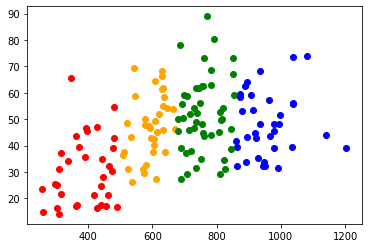

This is for the optional graph visualization
[2 3 2 2 2 3 0 2 1 1 2 3 0 2 3 3 0 0 1 0 2 2 3 3 3 1 2 2 1 3 0 3 0 1 1 2 1
 2 2 0 0 3 1 3 0 1 1 0 2 2 3 1 0 2 0 1 0 3 0 1 1 1 1 0 1 0 1 3 1 3 3 1 0 0
 3 1 1 2 2 2 1 1 1 0 0 3 3 3 0 2 2 2 1 0 3 2 2 2 2 3 1 2 3 2 1 2 0 0 2 1 0
 1 3 0 1 2 0 1 1 3 1 1 1 1 3 3 2 3 1 3 0 1 0 2 1 3 1 1 2 3 0 3 0 3 1 1 0 1
 3 1] [[389.24376607  30.26595725]
 [758.98082986  51.59080521]
 [957.1668831   48.16996042]
 [594.47181556  47.03422652]]


In [86]:
def visualization(xarr, yarr, indices, centers):
    #Note account for the different colors required depending on number of clusters
    #For the optional graph visualization when comparing features
    tempcolor_arr = ["red", "green", "blue", "orange", "purple", "pink"]
    for x in range(len(xarr)):
        plt.scatter(xarr[x], yarr[x], color=tempcolor_arr[indices[x]])
    plt.show()
def k_means_compare(feat1, feat2, gene, clusters = 2, vis = False):
    xarr = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat1].to_numpy()
    yarr = featuresdf.loc[featuresdf["gene_id"] == str(gene), feat2].to_numpy()
    comparitive_df = pd.DataFrame({
        'x': xarr,
        'y': yarr
    })
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(comparitive_df)
    indices = kmeans.predict(comparitive_df)
    centers = kmeans.cluster_centers_
    if(vis == True):
        visualization(xarr, yarr, indices, centers)
    return (indices, centers)
cluster_indices, cluster_centers = k_means_compare("neg_calc", "std", "1", clusters = 4, vis = True)
print(cluster_indices, cluster_centers)